In [ ]:
!pip install qutip

In [ ]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import math

In [ ]:
#menentukan nilai Parameter
wc = 2*np.pi         #frekuensi medan
wa = 2*np.pi         #frekuensi atom
N = 40              #jumlah n medan
use_rwa = False
g_list  = np.linspace(0, 100, 651)*2*np.pi   #kuat interaksi
d_list  = [1000, 750, 500, 250, 100, 75, 50, 25, 10, 7.5, 5, 2.5, 1, 0.75, 0.5, 0.25, 0.1, 0.075, 0.05]          #kuat energi qubit

In [ ]:
#operator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-minus
sz1 = tensor(qeye(N), sigmaz())  #operator sigma-z modifikasi
sx1 = tensor(qeye(N), sigmax())  #operator sigma-x modifikasi

In [ ]:
# Hamiltonian
Ho = wc * a.dag() * a     # osilator
Hq = 0.5 * wa * sz1      #qubit
   
# Hamiltonian Interaksi
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

### **S = 0.5,  $\Delta$ = (1000 sampai 1),  $\lambda$ = (0 sampai 10)**

In [ ]:
# Menghitung Hamiltonian 
psi_list = []
E_list = []
S = []
for d in d_list:
  psi_list1 = []
  for g in g_list:
    # Hamiltonian total
    H = Ho + Hq + g * H1
       
    # menghitung state & energinya (terurut berdasar nilai lambda)
    eigen_energy, eigen_state = H.groundstate() 
    psi_list1.append(eigen_state)

  # menghitung partial trace densitas matriks
  rho_q = []
  for i in range(len(psi_list1)):
    psi_value = psi_list1[i]*psi_list1[i].dag()
    rho = psi_value.ptrace(1)
    rho_q.append(rho)

  # menghitung entropi
  S1 = []
  for i in range(len(rho_q)):
    s_list = entropy_vn(rho_q[i],2)
    S1.append(s_list)

  psi_list.append(psi_list1)
  S.append(S1)

# mencari nilai g dan d yang memenuhi syarat (s = 0.5)
g_values = []
d_values = []
for d in range(len(S)):
  for g in range(len(S[d])):
    if round(S[d][g], 1) == 0.5:
      g_values.append(g_list[g]/d_list[d])
      d_values.append(wa/d_list[d])

In [ ]:
# mencari nilai g dan d yang memenuhi syarat (s = 0.5)
g_values2 = []
d_values2 = []
for d in range(len(S)):
  for g in range(len(S[d])):
    if round(S[d][g], 2) == 0.10:
      g_values2.append(g_list[g]/d_list[d])
      d_values2.append(wa/d_list[d])

Text(0.5, 0, '$\\frac{\\lambda}{\\hbar\\omega_{0}}$')

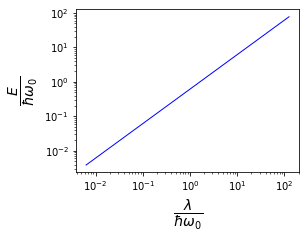

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(4,3))
 
axes.plot(d_values, g_values, 'blue', linewidth=1)
axes.plot(d_values2, g_values2, 'green', linewidth=1)

plt.yscale("log")
plt.xscale("log")

axes.set_ylabel(r"$\frac{E}{\hbar\omega_{0}}$", fontsize=20)
axes.set_xlabel(r"$\frac{\lambda}{\hbar\omega_{0}}$", fontsize=20)

In [ ]:
g_values

[0.0038665755736489765,
 0.005155434098198635,
 0.007733151147297953,
 0.015466302294595906,
 0.03866575573648976,
 0.05155434098198635,
 0.07733151147297952,
 0.15466302294595904,
 0.38665755736489765,
 0.5155434098198636,
 0.7733151147297953,
 1.5466302294595906,
 3.8665755736489764,
 5.1554340981986355,
 7.733151147297953,
 15.466302294595906,
 38.665755736489764,
 51.55434098198636,
 77.33151147297953]